In [2]:
#  importing headers and database
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
accuracy={}
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#  Phase 1 — Data Exploration

#  This step is necessary to familiarize with the data, to gain some understanding about the 
#  potential features and to see if data cleaning is needed.

In [3]:
print("Diabetes data set dimensions : {}".format(diabetes.shape))

Diabetes data set dimensions : (768, 9)


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Outcome
0    500
1    268
dtype: int64


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

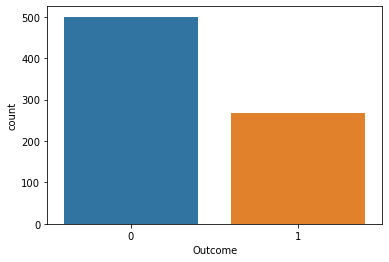

In [5]:
#Count of Outcome as 0 and 1 before data cleansing

import seaborn as sns
print(diabetes.groupby('Outcome').size())
sns.countplot(diabetes['Outcome'],label="Count")

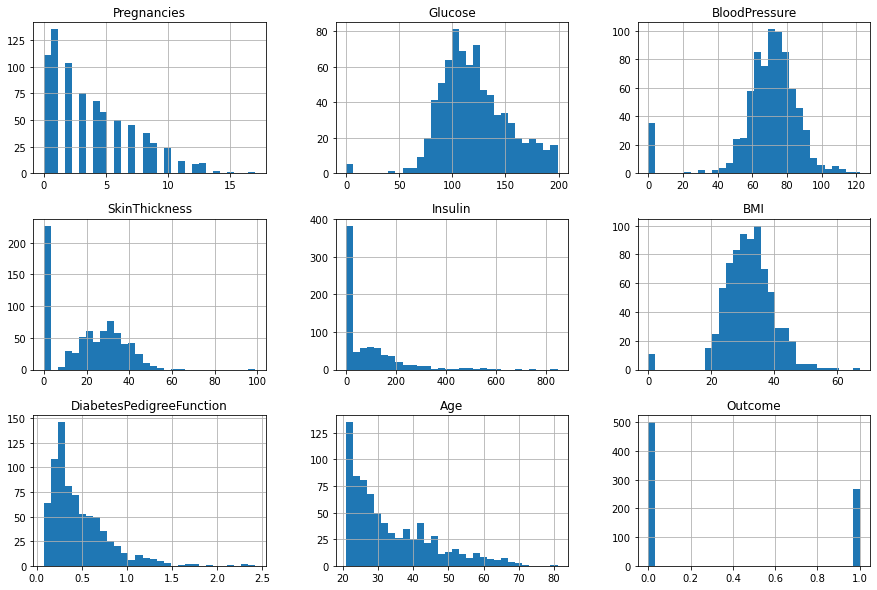

In [6]:
#Distribution of individual features

diabetes.hist(bins=30, figsize=(15,10))
plt.show()

In [ ]:
#  Phase 2— Data Cleaning

#  Next phase of the machine learning work flow is the data cleaning. Considered to be one of the crucial steps of the work
#  flow, because it can make or break the model. There is a saying in machine learning “Better data beats fancier algorithms”,
#  which suggests better data gives you better resulting models.

#  There are several factors to consider in the data cleaning process.

#  1.Duplicate or irrelevant observations.
#  2.Bad labeling of data, same category occurring multiple times.
#  3.Missing or null data points.
#  4.Unexpected outliers.

In [7]:
diabetes.isnull().sum()
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#  Blood pressure 

print("Total : ", diabetes[diabetes.BloodPressure == 0].shape[0])
print(diabetes[diabetes.BloodPressure == 0].groupby('Outcome')['BMI'].count())


Total :  35
Outcome
0    19
1    16
Name: BMI, dtype: int64


In [9]:
#  Plasma glucose levels

print("Total : ", diabetes[diabetes.Glucose == 0].shape[0])
print(diabetes[diabetes.Glucose == 0].groupby('Outcome')['Age'].count())

Total :  5
Outcome
0    3
1    2
Name: Age, dtype: int64


In [10]:
#  Skin Fold Thickness

print("Total : ", diabetes[diabetes.SkinThickness <= 10].shape[0])
print(diabetes[diabetes.SkinThickness <= 10].groupby('Outcome')['Age'].count())

Total :  236
Outcome
0    147
1     89
Name: Age, dtype: int64


In [11]:
#  BMI

print("Total : ", diabetes[diabetes.BMI == 0].shape[0])
print(diabetes[diabetes.BMI == 0].groupby('Outcome')['Age'].count())

Total :  11
Outcome
0    9
1    2
Name: Age, dtype: int64


In [12]:
#  Insulin

print("Total : ", diabetes[diabetes.Insulin == 0].shape[0])
print(diabetes[diabetes.Insulin == 0].groupby('Outcome')['Age'].count())

Total :  374
Outcome
0    236
1    138
Name: Age, dtype: int64


In [ ]:
#  ways to handle invalid data values (add documentation)

In [13]:
#  We will remove the rows which the “BloodPressure”, “BMI” and “Glucose” are zero.

diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]
print(diabetes_mod.shape)
(724, 9)

(724, 9)


(724, 9)

In [ ]:
#  Visualization on cleaned dataset before data cleansing

Outcome
0    475
1    249
dtype: int64


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

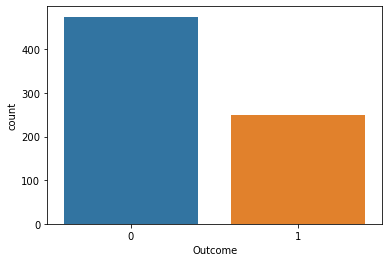

In [14]:
print(diabetes_mod.groupby('Outcome').size())
sns.countplot(diabetes_mod['Outcome'],label="Count")

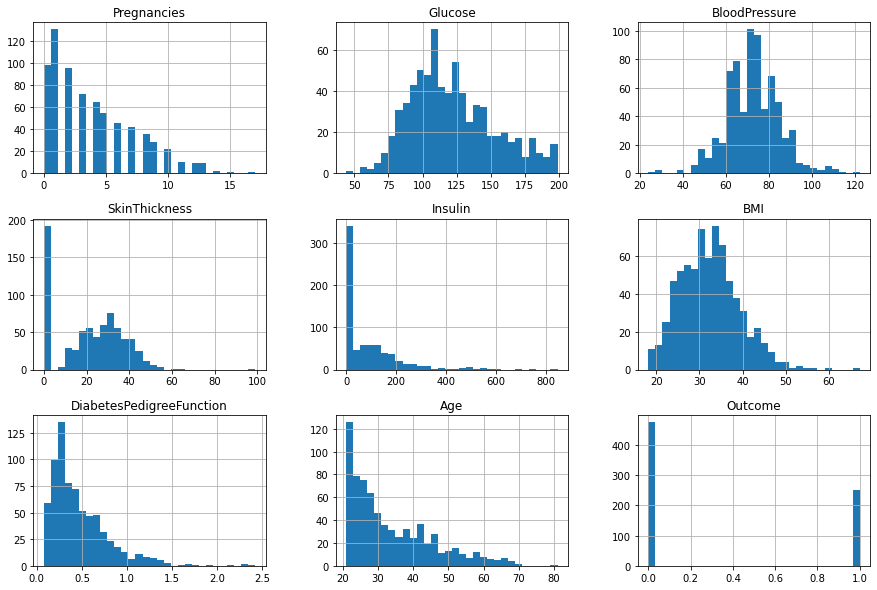

In [15]:
#Distribution of individual features after data cleansing

diabetes_mod.hist(bins=30, figsize=(15,10))
plt.show()

In [16]:
#  Phase 3— Models Analysis

#  first we perform KNN, Naive Bayes, Random Forest and Neural Network

In [17]:
# splitting data into train data and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes_mod.loc[:, diabetes_mod.columns != 'Outcome'], diabetes_mod['Outcome'], stratify=diabetes_mod['Outcome'], random_state=56)


In [ ]:
#KNN algorithm Implementation

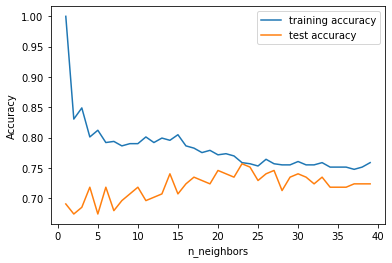

In [18]:
#  running KNN for 0 to 40 nodes to check which gives maximum accuracy

from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 40
neighbors_settings = range(1, 40)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [19]:
#  with the previous results we compute that the model gives the best results at around n=24
#  hence we proceed with n=24
#  n=number of neighbours

knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

accuracy.update({'K-NN':knn.score(X_test, y_test)})

Accuracy of K-NN classifier on training set: 0.76
Accuracy of K-NN classifier on test set: 0.75


In [ ]:
#Naive Bayes Implementation

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(X_train, y_train)
print('Accuracy of naive bayes classifier on training set: {:.2f}'.format(nb.score(X_train, y_train)))
print('Accuracy of naive bayes classifier on test set: {:.2f}'.format(nb.score(X_test, y_test)))

accuracy.update({'naive bayes':nb.score(X_test, y_test)})


In [ ]:
#  Random Forest Algorithm Implementation

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy of Random Forest on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy of Random Forest on test set: {:.3f}".format(rf.score(X_test, y_test)))

accuracy.update({'Random Forest':rf.score(X_test, y_test)})



Accuracy of Random Forest on training set: 1.000
Accuracy of Random Forest on test set: 0.746


In [ ]:
#  we try limiting the max_features to see if we get better results

In [21]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy of modified Random Forest on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy of modified Random Forest on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy of modified Random Forest on training set: 0.803
Accuracy of modified Random Forest on test set: 0.724


In [ ]:
#  it does not give better results, hence the default parameters will be retained

In [ ]:
#  Feature importance in Random Forest (to see which parameters from the database are used most)

In [25]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_mod.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plt.savefig('feature_importance')


<Figure size 432x288 with 0 Axes>

In [ ]:
#  SVM Implementation

In [26]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
print("Accuracy of SVM on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy of SVM on test set: {:.2f}".format(svc.score(X_test, y_test)))



Accuracy of SVM on training set: 1.00
Accuracy of SVM on test set: 0.66


In [ ]:
#  The model overfits quite substantially, with a perfect score on the training set and only 65% accuracy on the test set.

#  SVM requires all the features to vary on a similar scale. We will need to re-scale our data that all the features are 
#  approximately on the same scale:

In [27]:
#  scaled data SVM
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))
X_test_scaled = scaler.fit_transform(X_test.astype(float))


svc = SVC(gamma='auto')
svc.fit(X_train_scaled, y_train)
print("Accuracy of modified SVM on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy of modified SVM on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

accuracy.update({'SVM':svc.score(X_test_scaled, y_test)})


y_pred = svc.predict(X_train)


#print(y_pred)


Accuracy of modified SVM on training set: 0.78
Accuracy of modified SVM on test set: 0.80


In [ ]:
#  Scaling the data made a huge difference! Now we are actually underfitting, where training and test set performance 
#  are quite similar but less close to 100% accuracy. From here, we can try increasing either C or gamma to fit a more 
#  complex model.

In [28]:
svc = SVC(C=1000,gamma='auto')
svc.fit(X_train_scaled, y_train)
print("Accuracy of modified SVM on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy of modified SVM on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy of modified SVM on training set: 0.805
Accuracy of modified SVM on test set: 0.751


In [ ]:
#  Here, increasing C gave us worse reults hence we do not to underfit the data

In [ ]:
#  Gradient Boosting

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
print("Accuracy of Gradient Boosting on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy of Gradient Boosting on test set: {:.3f}".format(gb.score(X_test, y_test)))

accuracy.update({'Gradient Boosting':gb.score(X_test, y_test)})

Accuracy of Gradient Boosting on training set: 0.941
Accuracy of Gradient Boosting on test set: 0.785


In [32]:
print('Accuracy of various Algorithms: ',accuracy)

Accuracy of various Algorithms:  {'K-NN': 0.7513812154696132, 'Random Forest': 0.7458563535911602, 'SVM': 0.7955801104972375, 'Gradient Boosting': 0.7845303867403315}


<function matplotlib.pyplot.show(close=None, block=None)>

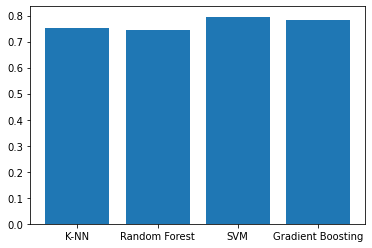

In [33]:
plt.bar(range(len(accuracy)), list(accuracy.values()), align='center')
plt.xticks(range(len(accuracy)), list(accuracy.keys()))
plt.show

In [ ]:
#  from the above analysis of models we realize that SVM gives us the best results

In [ ]:
#  Phase 4— Relation of various Features

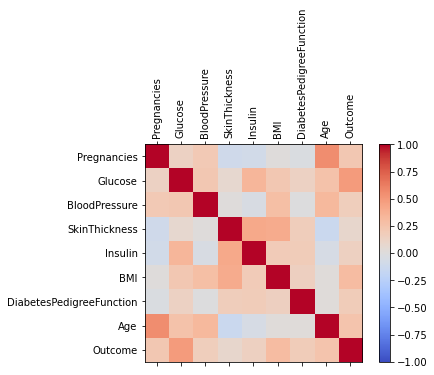

In [34]:
print()
corr = diabetes_mod.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(diabetes_mod.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(diabetes_mod.columns)
ax.set_yticklabels(diabetes_mod.columns)
plt.show()

In [35]:
#  from the above diagram we see that glucose level, BMI, Pregnancies, Age and Diabetes Pedigree Function have the maximum 
#  impact on the prediction.

In [ ]:
#  Phase 5— testing different SVM kernel functions

In [36]:
print('Polynomial kernel:')
svc2 = SVC(kernel='poly', degree=3, gamma='auto')  

svc2.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(svc2.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc2.score(X_test_scaled, y_test)))

print('\nGaussian radial basis function:')
svc2 = SVC(kernel='rbf', gamma='auto')  

svc2.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(svc2.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc2.score(X_test_scaled, y_test)))

print('\nSigmoid kernel:')
svc2 = SVC(kernel='sigmoid', gamma='auto')  

svc2.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(svc2.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc2.score(X_test_scaled, y_test)))

print('\nLinear kernel:')
svc2 = SVC(kernel='linear', gamma='auto')  

svc2.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(svc2.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc2.score(X_test_scaled, y_test)))

Polynomial kernel:
Accuracy on training set: 0.66
Accuracy on test set: 0.66

Gaussian radial basis function:
Accuracy on training set: 0.78
Accuracy on test set: 0.80

Sigmoid kernel:
Accuracy on training set: 0.77
Accuracy on test set: 0.75

Linear kernel:
Accuracy on training set: 0.78
Accuracy on test set: 0.75


In [ ]:
#  hence we conclude that Gaussian radial basis function gives us the best accuracy
#  and we proceed with that model

In [ ]:
#  Phase 6— Actual Prediction


In [37]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))
X_test_scaled = scaler.fit_transform(X_test.astype(float))
svc = SVC(gamma='auto')
svc.fit(X_train_scaled, y_train)
#print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
#print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

SVC(gamma='auto')

In [38]:
y_pred = svc.predict(X_test_scaled)

y_pred_list=list(y_pred)
y_train_test=list(y_test)

tp=0
tn=0
fp=0
fn=0

for x in range(0,len(y_pred)):
    if y_pred_list[x]==1 and y_train_test[x]==1:
        tp = tp + 1
    if y_pred_list[x]==0 and y_train_test[x]==0:
        tn = tn + 1
    if y_pred_list[x]==1 and y_train_test[x]==0:
        fp = fp + 1
    if y_pred_list[x]==0 and y_train_test[x]==1:
        fn = fn + 1

print('Confusion Matrix:  ')
print('\t\tActual values')
print('\t\t 1\t 0')
print('pred\t1\t',tp,'\t',fp)
print('icted\t0\t',fn,'\t',tn)

acc=(tp+tn)/(tp+fp+tn+fn)
print('\nAccuracy: ',acc)
print('Misclassification: ',1-acc)
print('Sensitivity: ',tp/(tp+fn))
print('Specificity: ',tn/(fp+tn))
prec = tp/(tp+fp)
print('Precision: ',prec)
recall = tp/(tp+fn)
print('Recall: ',recall)
print('Fscore: ',2*prec*recall/(prec+recall))
#print(list(X_train_scaled))

Confusion Matrix:  
		Actual values
		 1	 0
pred	1	 39 	 14
icted	0	 23 	 105

Accuracy:  0.7955801104972375
Misclassification:  0.20441988950276246
Sensitivity:  0.6290322580645161
Specificity:  0.8823529411764706
Precision:  0.7358490566037735
Recall:  0.6290322580645161
Fscore:  0.6782608695652174


In [39]:
p=int(input('Pregnancies: '))
g=int(input('Glucose: '))
bp=int(input('Blood Pressure: '))
st=int(input('Skin Thickness: '))
i=int(input('Insulin: '))
bmi=float(input('BMI: '))
dpf=float(input('DPF: '))
a=int(input('Age: '))

li=[p,g,bp,st,i,bmi,dpf,a]

X_test_temp = X_test


linp=np.asarray(li)

X_test_temp = np.vstack([X_test_temp,linp])

#print(X_test_temp)

X_test_scaled_temp = scaler.fit_transform(X_test_temp.astype(float))


y_pred_temp = svc.predict(X_test_scaled_temp)

y_pred_list_temp=list(y_pred_temp)


print('\nPredicted Outcome is: ')

if y_pred_list_temp[-1]==1:
    print('Diabetes Predicted')
else:
    print('Diabetes Not Predicted')
#print(y_pred_list_temp[-1])




Pregnancies: 2
Glucose: 222
Blood Pressure: 222
Skin Thickness: 111
Insulin: 333
BMI: 33
DPF: 33
Age: 44

Predicted Outcome is: 
Diabetes Predicted
